**Step 4. Visualization**

As per usual, let's import all the libraries and start the Client.

In [15]:
import json
import pandas as pd
import numpy as np
import nltk
import nltk.corpus
from nltk.tokenize import RegexpTokenizer
import os
from dask import bag as db 
from dask import dataframe as dd
import seaborn as sns
import graphviz
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt

In [2]:
from dask.distributed import Client
client=Client(n_workers=8,)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 8,Total memory: 8.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:54521,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 8.00 GiB
Comm: tcp://127.0.0.1:54548,Total threads: 1
Dashboard: http://127.0.0.1:54549/status,Memory: 1.00 GiB
Nanny: tcp://127.0.0.1:54524,


Load in the dataframe:

In [3]:
df = dd.read_parquet('/Users/romanpavlyutin/downloads/vader_sentiment_computed')
df.head(10)

,user_id,countStatus,user_screen_name,text_string_lem,compound,neg,neu,pos,sentiment
tweet_id,,,,,,,,,
1511650360317861894,1510316194418597897,8,JaineetKing,purplenftmuseum talkado nft whitelist live tal...,0.0,0.0,1.0,0.0,neutral
1511650360385052680,1452885627595149312,1,MohdNazriMohdN9,ameergiveaway hey guys ameer made new account ...,0.34,0.0,0.854,0.146,positive
1511650360414584836,1487770961176719367,3,kborsalino00,yogetoth hello elefbody starting april 2022 ut...,0.4404,0.0,0.86,0.14,positive
1511650360628293635,1507030320847245312,2,Alikhan13319125,lacryptomonnai1 real utility development 1000x...,0.0,0.0,1.0,0.0,neutral
1511650360758263811,1171555019478507520,4,Imola_red888,locommunitynft fatima living life spots grabs ...,0.3612,0.0,0.762,0.238,positive
1511650360833716230,1497442153592606722,7,Mrszoe8,promote 0kaezkyesi,0.3818,0.0,0.278,0.722,positive
1511650360905113600,1486787670491766784,6,ngorji3,bigtraderrrrr altcoinworldcom new generation c...,0.0,0.0,1.0,0.0,neutral
1511650360951255040,1467093830830800902,5,manishms75,autofarmnetwork great project cryptocurrency i...,0.872,0.0,0.336,0.664,positive
1511650361211506688,1499998570899914753,10,Aprilw1nberkah,tiarcrypto 250 juta hours tap star dextools pr...,0.0,0.0,1.0,0.0,neutral


Counting how many negatives, neutrals and positives we have.

In [6]:
df.sentiment.value_counts().compute()

positive    4509640
neutral     1643328
negative     636204
Name: sentiment, dtype: int64

Here we see the amount of positive/negative/neutral posts. 

We see that the overall sentiment is mostly positive. Negative sentiment is very rare, which indicates herding effects and bubbles, what has to be analysed in the further studies.

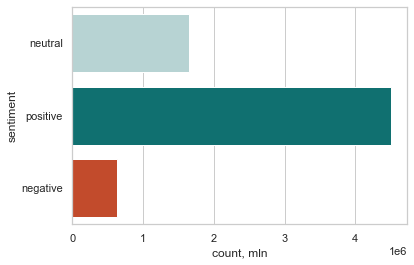

In [35]:
# Bar chart
ax = sns.countplot(y='sentiment', 
             data=df.compute(), 
             palette=['#b2d8d8',"#008080", '#db3d13'],
             );
ax.set(xlabel='count, mln')
plt.show()

In order to draw box- and violin- plots, we need to transform our compound column back to numeric values. We can also transform other columns as well, in case we need them later.

In [33]:
# Changing back to floats
df['compound'] = df['compound'].astype(float)
df['user_id'] = df['user_id'].astype(int)
df['neg'] = df['neg'].astype(float)
df['neu'] = df['neu'].astype(float)
df['pos'] = df['pos'].astype(float)

In [34]:
df.dtypes

user_id               int64
countStatus           int64
user_screen_name     object
text_string_lem      object
compound            float64
neg                 float64
neu                 float64
pos                 float64
sentiment            object
dtype: object

Let's build a box-plot.

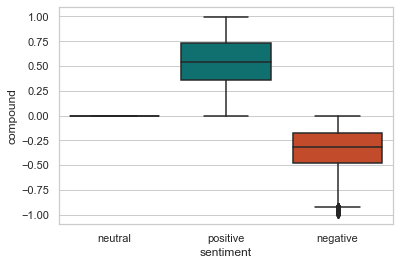

In [36]:
# Box plot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df.compute());

The boxplots show that the positive sentiment is distributed more equally, while most of the negative sentiment have compounds near -0.25.

Neutral posts are very rare because of the VADER algorithm. Only posts with a compund of zero are neutral. Therefore, the boxplots for neutral posts is not very meaningful.

Now, for to get a better idea of how these sentiments are distributed, let's draw a violin-plot:

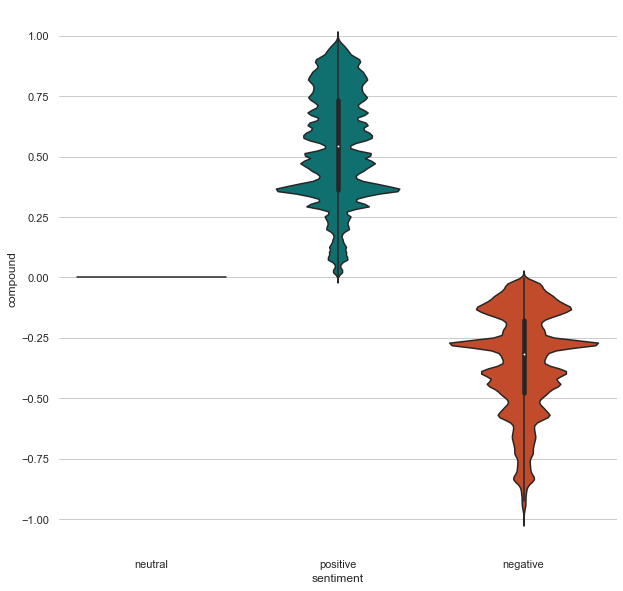

In [39]:
# Violin plot
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)

group_order = ["neutral", "positive", "negative"]

with ProgressBar():
    sns.violinplot(x="sentiment", y="compound", data=df.compute(), order=group_order, palette=['#b2d8d8',"#008080", '#db3d13'], ax=ax)

The violin plot shows a expected significant difference between the positive and negative sentiment.

We also see that there are not as many extremly negative posts. The positive sentiment is distributed more equally than the negative one, which peaks at a compound near -0.25.
